Libraries imported successfully!
NumPy version: 2.4.1
Pandas version: 2.3.3

TRAINING DATA OVERVIEW

Dataset shape: (30, 7)
Number of samples: 30

First 10 rows:
   word_count  has_action  has_dialogue  has_multiple_characters  \
0          15           0             1                        0   
1          45           0             1                        1   
2          78           1             0                        1   
3          23           0             1                        1   
4          56           1             1                        1   
5          89           1             0                        1   
6          34           0             1                        0   
7          67           1             0                        1   
8          12           0             1                        0   
9          90           1             0                        1   

   complexity_score  location_changes  shot_count  
0                 2                 0

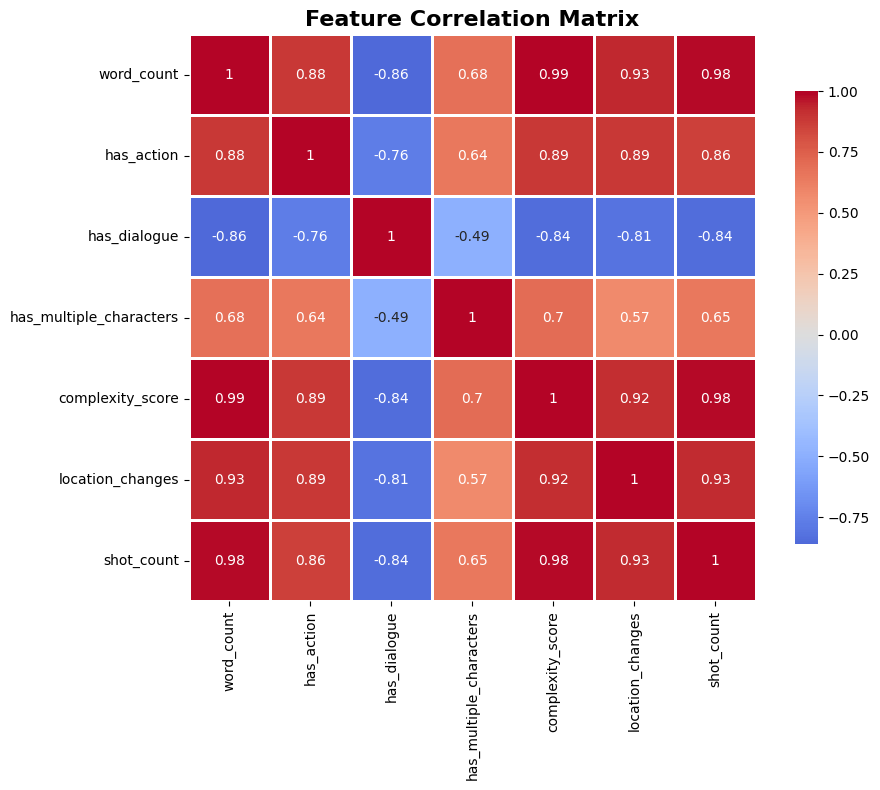

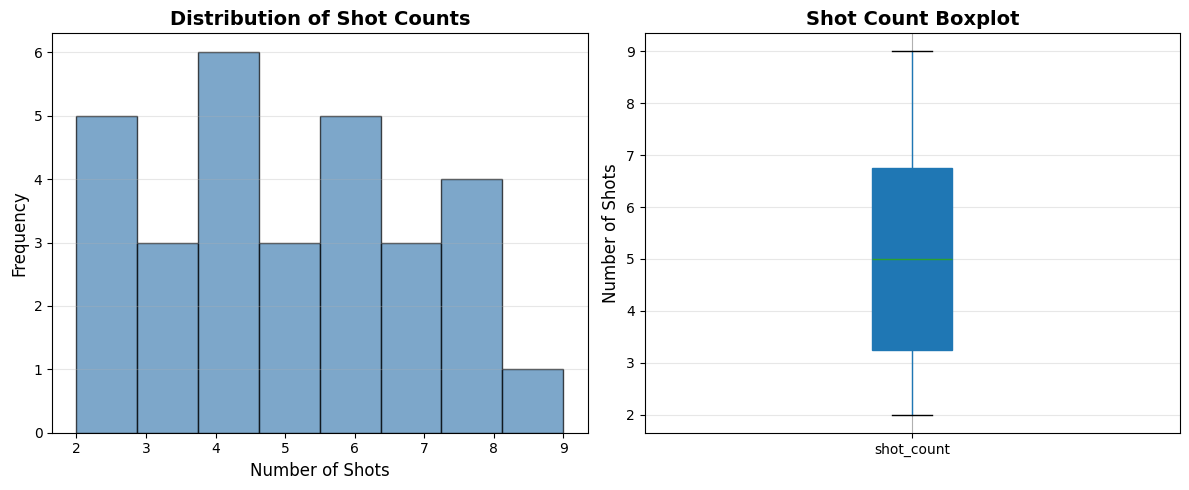

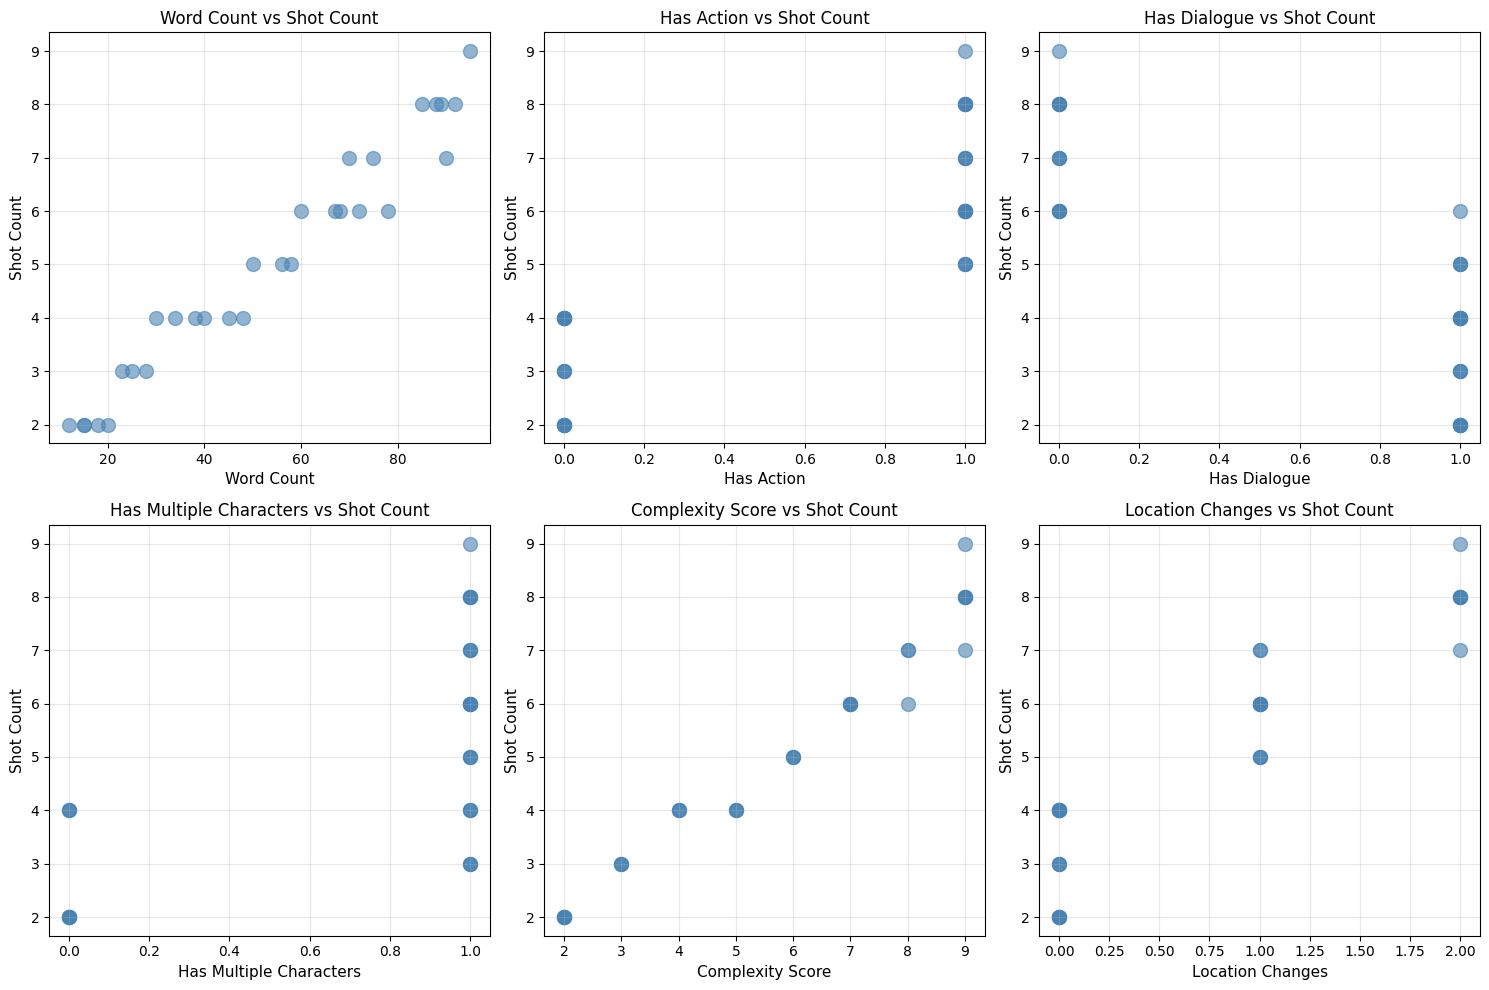


Correlation with Shot Count:
shot_count                 1.000000
complexity_score           0.982194
word_count                 0.978209
location_changes           0.926625
has_action                 0.860030
has_multiple_characters    0.646830
has_dialogue              -0.843374
Name: shot_count, dtype: float64

DATA SPLIT SUMMARY
Training set size: 24 samples
Testing set size: 6 samples
Feature columns: ['word_count', 'has_action', 'has_dialogue', 'has_multiple_characters', 'complexity_score', 'location_changes']
Target variable: shot_count

MODEL TRAINING & EVALUATION

Linear Regression:
  Train MSE: 0.0859
  Test MSE: 0.3309
  Train R²: 0.9795
  Test R²: 0.9327
  MAE: 0.4371
  Cross-Val MSE: 0.2229

Random Forest:
  Train MSE: 0.0197
  Test MSE: 0.2810
  Train R²: 0.9953
  Test R²: 0.9428
  MAE: 0.3750
  Cross-Val MSE: 0.2422

Gradient Boosting:
  Train MSE: 0.0000
  Test MSE: 0.2709
  Train R²: 1.0000
  Test R²: 0.9449
  MAE: 0.3515
  Cross-Val MSE: 0.2540


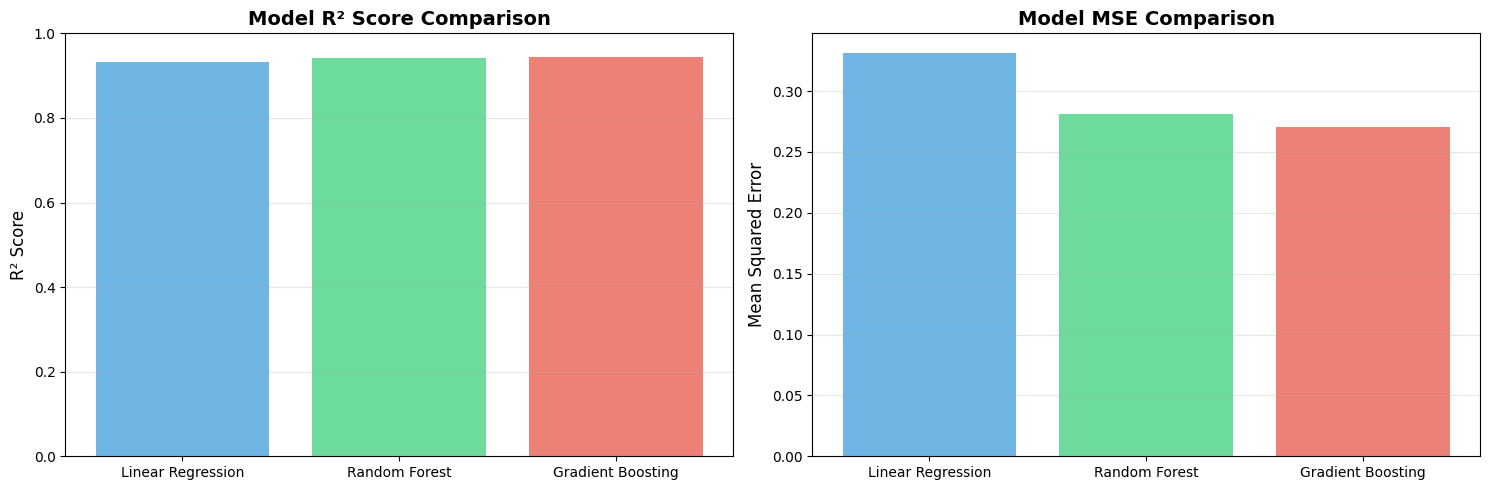

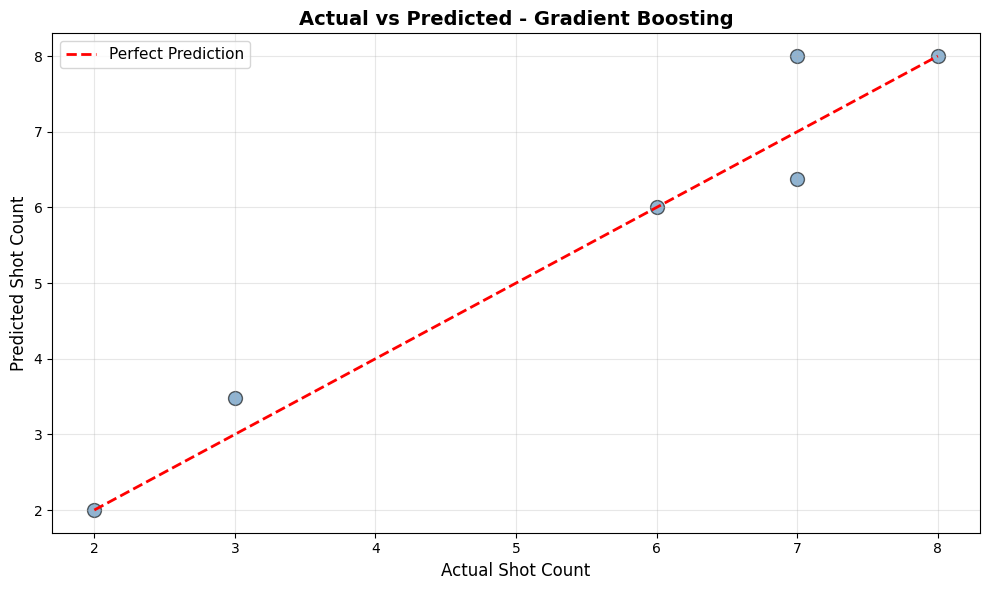


✅ Best Model: Gradient Boosting
   R² Score: 0.9449

FEATURE IMPORTANCE (Random Forest)
                   feature  importance
0               word_count    0.412499
4         complexity_score    0.398265
5         location_changes    0.085663
2             has_dialogue    0.054031
1               has_action    0.045890
3  has_multiple_characters    0.003652


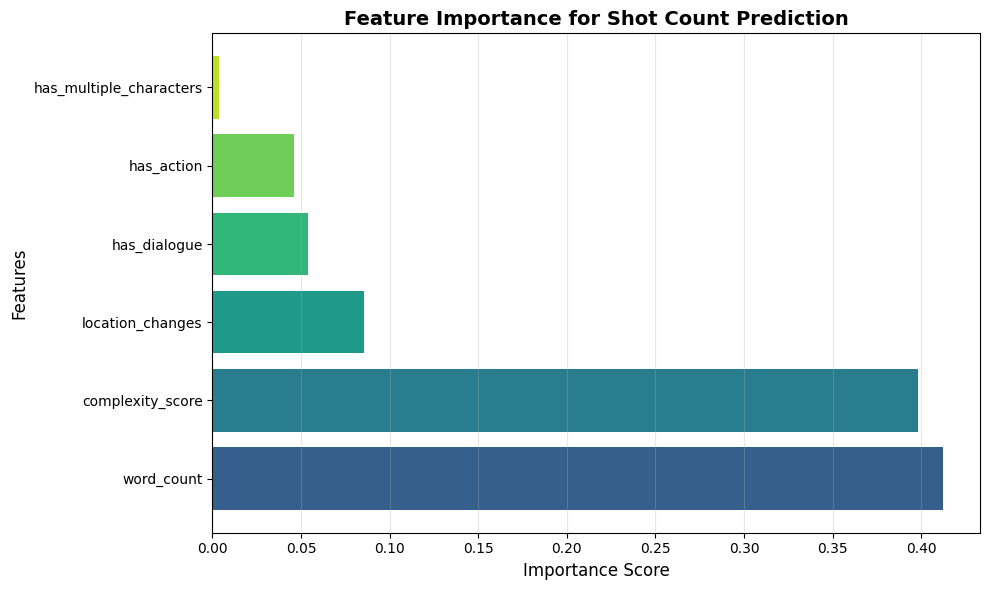


MODEL SAVED
✅ Model saved to: ../models/shot_predictor.pkl
✅ Feature names saved to: ../models/feature_names.pkl
✅ Model type: Gradient Boosting

TEST PREDICTIONS

Simple dialogue scene:
  Features: [20, 0, 1, 1, 3, 0]
  Predicted shots: 3

Complex action sequence:
  Features: [80, 1, 0, 1, 9, 2]
  Predicted shots: 7

Medium romantic scene:
  Features: [45, 0, 1, 1, 5, 1]
  Predicted shots: 4

Short establishing shot:
  Features: [10, 0, 0, 0, 2, 0]
  Predicted shots: 2

FINAL MODEL PERFORMANCE REPORT

📊 Dataset Information:
   Total samples: 30
   Training samples: 24
   Testing samples: 6
   Number of features: 6

🏆 Best Model: Gradient Boosting
   Test R² Score: 0.9449
   Test MSE: 0.2709
   Test MAE: 0.3515

📈 Top 3 Important Features:
   1. word_count: 0.4125
   5. complexity_score: 0.3983
   6. location_changes: 0.0857

💾 Saved Artifacts:
   ✅ Model: ../models/shot_predictor.pkl
   ✅ Features: ../models/feature_names.pkl

✨ Training Complete! Model ready for production use.


In [1]:
# Shot Prediction Jupyter Notebook
# File: notebooks/shot_prediction.ipynb
# Purpose: Train ML model to predict optimal shot count based on scene features

# ============================================================================
# CELL 1: Import Libraries
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

# ============================================================================
# CELL 2: Create Training Dataset
# ============================================================================

# Simulated training data based on real cinematography principles
# In production, this would come from your database
training_data = {
    'word_count': [15, 45, 78, 23, 56, 89, 34, 67, 12, 90, 
                   25, 50, 70, 30, 60, 85, 40, 75, 20, 95,
                   18, 48, 72, 28, 58, 88, 38, 68, 15, 92],
    
    'has_action': [0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
                   0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
                   0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    
    'has_dialogue': [1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
                     1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
                     1, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    
    'has_multiple_characters': [0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
                                1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
                                0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    
    'complexity_score': [2, 5, 8, 3, 6, 9, 4, 7, 2, 9,
                        3, 6, 8, 4, 7, 9, 5, 8, 2, 9,
                        2, 5, 7, 3, 6, 9, 4, 7, 2, 9],
    
    'location_changes': [0, 0, 1, 0, 1, 2, 0, 1, 0, 2,
                        0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
                        0, 0, 1, 0, 1, 2, 0, 1, 0, 2],
    
    # Target variable: number of recommended shots
    'shot_count': [2, 4, 6, 3, 5, 8, 4, 6, 2, 7,
                   3, 5, 7, 4, 6, 8, 4, 7, 2, 9,
                   2, 4, 6, 3, 5, 8, 4, 6, 2, 8]
}

df = pd.DataFrame(training_data)

print("\n" + "="*60)
print("TRAINING DATA OVERVIEW")
print("="*60)
print(f"\nDataset shape: {df.shape}")
print(f"Number of samples: {len(df)}")
print("\nFirst 10 rows:")
print(df.head(10))

print("\nDataset Statistics:")
print(df.describe())

# ============================================================================
# CELL 3: Exploratory Data Analysis (EDA)
# ============================================================================

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Distribution of shot counts
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['shot_count'], bins=8, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Shots', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Shot Counts', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
df.boxplot(column='shot_count', vert=True, patch_artist=True)
plt.ylabel('Number of Shots', fontsize=12)
plt.title('Shot Count Boxplot', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Feature relationships with target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['word_count', 'has_action', 'has_dialogue', 
            'has_multiple_characters', 'complexity_score', 'location_changes']

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    ax.scatter(df[feature], df['shot_count'], alpha=0.6, s=100, color='steelblue')
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    ax.set_ylabel('Shot Count', fontsize=11)
    ax.set_title(f'{feature.replace("_", " ").title()} vs Shot Count', fontsize=12)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCorrelation with Shot Count:")
print(df.corr()['shot_count'].sort_values(ascending=False))

# ============================================================================
# CELL 4: Prepare Data for Training
# ============================================================================

# Define features and target
X = df[['word_count', 'has_action', 'has_dialogue', 
        'has_multiple_characters', 'complexity_score', 'location_changes']]
y = df['shot_count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n" + "="*60)
print("DATA SPLIT SUMMARY")
print("="*60)
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Feature columns: {list(X.columns)}")
print(f"Target variable: shot_count")

# ============================================================================
# CELL 5: Train Multiple Models
# ============================================================================

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

print("\n" + "="*60)
print("MODEL TRAINING & EVALUATION")
print("="*60)

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, 
                                scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    
    results[name] = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'mae': mae,
        'cv_mse': cv_mse,
        'predictions': y_pred_test
    }
    
    print(f"\n{name}:")
    print(f"  Train MSE: {train_mse:.4f}")
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  Cross-Val MSE: {cv_mse:.4f}")

# ============================================================================
# CELL 6: Model Comparison Visualization
# ============================================================================

# Compare model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R² Score comparison
model_names = list(results.keys())
r2_scores = [results[m]['test_r2'] for m in model_names]
mse_scores = [results[m]['test_mse'] for m in model_names]

axes[0].bar(model_names, r2_scores, color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Model R² Score Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(model_names, mse_scores, color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.7)
axes[1].set_ylabel('Mean Squared Error', fontsize=12)
axes[1].set_title('Model MSE Comparison', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Actual vs Predicted for best model
best_model_name = max(results.keys(), key=lambda k: results[k]['test_r2'])
best_predictions = results[best_model_name]['predictions']

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.6, s=100, color='steelblue', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Shot Count', fontsize=12)
plt.ylabel('Predicted Shot Count', fontsize=12)
plt.title(f'Actual vs Predicted - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Best Model: {best_model_name}")
print(f"   R² Score: {results[best_model_name]['test_r2']:.4f}")

# ============================================================================
# CELL 7: Feature Importance (Random Forest)
# ============================================================================

# Get Random Forest model
rf_model = results['Random Forest']['model']

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*60)
print("FEATURE IMPORTANCE (Random Forest)")
print("="*60)
print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Shot Count Prediction', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# CELL 8: Save Best Model
# ============================================================================

# Save the best performing model
best_model = results[best_model_name]['model']

# Create models directory if it doesn't exist
import os
os.makedirs('../models', exist_ok=True)

# Save model
model_path = '../models/shot_predictor.pkl'
joblib.dump(best_model, model_path)

# Save feature names for later use
feature_names_path = '../models/feature_names.pkl'
joblib.dump(list(X.columns), feature_names_path)

print("\n" + "="*60)
print("MODEL SAVED")
print("="*60)
print(f"✅ Model saved to: {model_path}")
print(f"✅ Feature names saved to: {feature_names_path}")
print(f"✅ Model type: {best_model_name}")

# ============================================================================
# CELL 9: Test Prediction Function
# ============================================================================

def predict_shot_count(word_count, has_action, has_dialogue, 
                       has_multiple_characters, complexity_score, location_changes):
    """
    Predict optimal shot count for a scene
    
    Parameters:
    - word_count: Number of words in scene description
    - has_action: 1 if scene has action, 0 otherwise
    - has_dialogue: 1 if scene has dialogue, 0 otherwise
    - has_multiple_characters: 1 if multiple characters, 0 otherwise
    - complexity_score: Scene complexity (1-10)
    - location_changes: Number of location changes
    
    Returns:
    - Predicted number of shots (rounded to nearest integer)
    """
    input_features = np.array([[word_count, has_action, has_dialogue, 
                               has_multiple_characters, complexity_score, 
                               location_changes]])
    
    prediction = best_model.predict(input_features)[0]
    return int(round(prediction))

# Test predictions
print("\n" + "="*60)
print("TEST PREDICTIONS")
print("="*60)

test_cases = [
    {"desc": "Simple dialogue scene", "features": [20, 0, 1, 1, 3, 0]},
    {"desc": "Complex action sequence", "features": [80, 1, 0, 1, 9, 2]},
    {"desc": "Medium romantic scene", "features": [45, 0, 1, 1, 5, 1]},
    {"desc": "Short establishing shot", "features": [10, 0, 0, 0, 2, 0]}
]

for test in test_cases:
    prediction = predict_shot_count(*test['features'])
    print(f"\n{test['desc']}:")
    print(f"  Features: {test['features']}")
    print(f"  Predicted shots: {prediction}")

# ============================================================================
# CELL 10: Model Performance Summary Report
# ============================================================================

print("\n" + "="*80)
print("FINAL MODEL PERFORMANCE REPORT")
print("="*80)

print(f"\n📊 Dataset Information:")
print(f"   Total samples: {len(df)}")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")
print(f"   Number of features: {X.shape[1]}")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"   Test MSE: {results[best_model_name]['test_mse']:.4f}")
print(f"   Test MAE: {results[best_model_name]['mae']:.4f}")

print(f"\n📈 Top 3 Important Features:")
for idx, row in feature_importance.head(3).iterrows():
    print(f"   {idx+1}. {row['feature']}: {row['importance']:.4f}")

print(f"\n💾 Saved Artifacts:")
print(f"   ✅ Model: {model_path}")
print(f"   ✅ Features: {feature_names_path}")

print("\n" + "="*80)
print("✨ Training Complete! Model ready for production use.")
print("="*80)